In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fake_path = './data/fake.csv'
true_path = './data/true.csv'
fake_df = pd.read_csv(fake_path)
true_df = pd.read_csv(true_path)

In [3]:
fake_df.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [4]:
true_df.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [5]:
fake_df['label'] = 1
true_df['label'] = 0

In [6]:
result_df = pd.concat([fake_df, true_df], ignore_index=True)

In [7]:
result_df['message_length'] = result_df['text'].apply(len)

In [8]:
result_df['message_length'] += result_df['title'].apply(len)

In [9]:
result_df.tail()

,title,text,subject,date,label,message_length
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0,2882
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0,852
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0,1999
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0,1260
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0,1390


Text(0.5, 0, 'Message Length')

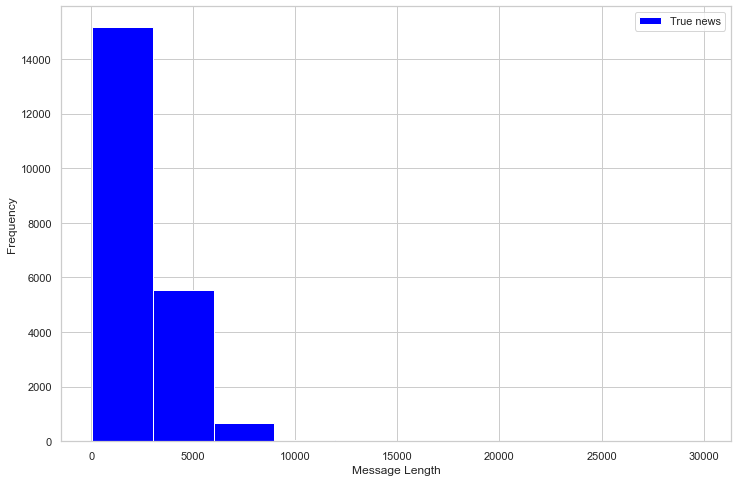

In [10]:
plt.figure(figsize=(12, 8))

result_df[result_df['label']==0]['message_length'].plot(kind='hist', color='blue', label='True news')
plt.legend()
plt.xlabel("Message Length")

Text(0.5, 0, 'Message Length')

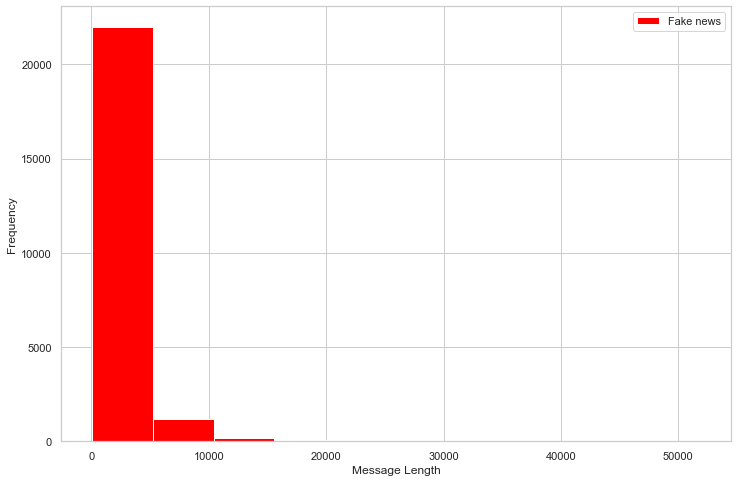

In [11]:
plt.figure(figsize=(12, 8))

result_df[result_df['label']==1]['message_length'].plot(kind='hist', color='red', label='Fake news')
plt.legend()
plt.xlabel("Message Length")

In [12]:
import nltk
nltk.download('stopwords')
nltk.download("names")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\euise\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\euise\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [13]:
from nltk.corpus import stopwords
from nltk.corpus import names

In [14]:
all_names = set(names.words())

In [15]:
import string
def clean_text(mess):
    stop_words = stopwords.words('english') + ['the', 'to', 'of']
    del_punctuation = [char.lower() for char in mess if char not in string.punctuation]
    del_punctuation = ''.join(del_punctuation)
    
    return ' '.join([word for word in del_punctuation.split() if word.lower() not in (stop_words or all_names)])

In [16]:
result_df['clean_message'] = result_df['text'].apply(clean_text)
result_df.tail()

,title,text,subject,date,label,message_length,clean_message
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0,2882,brussels reuters nato allies tuesday welcomed ...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0,852,london reuters lexisnexis provider legal regul...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0,1999,minsk reuters shadow disused sovietera factori...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0,1260,moscow reuters vatican secretary state cardina...
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0,1390,jakarta reuters indonesia buy 11 sukhoi fighte...


In [17]:
result_df['clean_message'] += result_df['title'].apply(clean_text)
result_df.tail()

,title,text,subject,date,label,message_length,clean_message
44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0,2882,brussels reuters nato allies tuesday welcomed ...
44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0,852,london reuters lexisnexis provider legal regul...
44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0,1999,minsk reuters shadow disused sovietera factori...
44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0,1260,moscow reuters vatican secretary state cardina...
44897,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",0,1390,jakarta reuters indonesia buy 11 sukhoi fighte...


In [18]:
2882 - len(result_df['clean_message'][44893])

833

In [19]:
from collections import Counter

words = result_df[result_df['label']==0]['clean_message'].apply(lambda x: [word for word in x.split()])
true_news_words = Counter()

for msg in words:
    true_news_words.update(msg)
    
print(true_news_words.most_common(30))

[('said', 96956), ('trump', 44495), ('us', 43216), ('would', 31640), ('reuters', 28287), ('president', 25622), ('state', 19061), ('government', 18168), ('house', 17426), ('new', 17402), ('states', 16133), ('also', 15944), ('republican', 15675), ('united', 15607), ('people', 14633), ('told', 14283), ('could', 13875), ('last', 12650), ('one', 12354), ('washington', 12172), ('two', 11732), ('election', 11711), ('trump’s', 11624), ('party', 11542), ('former', 10740), ('north', 10597), ('campaign', 10513), ('donald', 10337), ('year', 10308), ('security', 10288)]


In [20]:
from collections import Counter

words = result_df[result_df['label']==1]['clean_message'].apply(lambda x: [word for word in x.split()])
fake_news_words = Counter()

for msg in words:
    fake_news_words.update(msg)
    
print(fake_news_words.most_common(30))

[('trump', 78981), ('said', 31145), ('president', 26336), ('people', 26325), ('would', 23650), ('one', 23319), ('us', 22903), ('obama', 19133), ('clinton', 18828), ('like', 17944), ('donald', 17700), ('video', 15666), ('also', 15247), ('hillary', 14895), ('new', 14825), ('even', 13793), ('news', 13749), ('white', 13419), ('time', 12901), ('state', 12852), ('media', 11511), ('via', 11174), ('get', 11014), ('house', 10995), ('campaign', 10987), ('america', 10951), ('know', 10415), ('could', 10407), ('first', 10251), ('american', 10204)]


In [21]:
X = result_df['clean_message']
y = result_df['label']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 1234)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31428,), (13470,), (31428,), (13470,))

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
vectorizer = CountVectorizer()

In [27]:
X_train_docs = vectorizer.fit_transform(X_train)
X_test_docs = vectorizer.transform(X_test)
print(X_train_docs.shape, X_test_docs.shape)

(31428, 207868) (13470, 207868)


In [28]:
X_train_docs.toarray()
X_test_docs.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
from sklearn.naive_bayes import MultinomialNB

In [30]:
naive_bayes = MultinomialNB(alpha=1, fit_prior=True)

In [31]:
naive_bayes.fit(X_train_docs, y_train)

MultinomialNB(alpha=1)

In [32]:
y_pred = naive_bayes.predict(X_test_docs)

In [33]:
naive_bayes.score(X_test_docs, y_test)

0.9557535263548627

In [34]:
y_pred_proba = naive_bayes.predict_proba(X_test_docs)
y_pred_proba

array([[1.44370683e-084, 1.00000000e+000],
       [6.84226586e-004, 9.99315773e-001],
       [1.54851509e-016, 1.00000000e+000],
       ...,
       [1.00000000e+000, 6.05089154e-119],
       [1.00000000e+000, 3.01655703e-019],
       [1.00000000e+000, 1.15350827e-084]])

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score

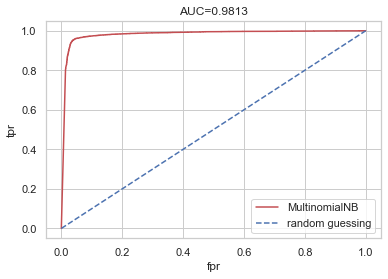

In [36]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc = roc_auc_score(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, "r-", label="MultinomialNB")
plt.plot([0, 1], [0, 1], "b--", label="random guessing")
plt.title("AUC={:.4f}".format(auc))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()

In [37]:
from sklearn.model_selection import GridSearchCV

In [104]:
parameters = {
    'alpha': [0.00625, 0.0135, 0.027],
    'fit_prior': [True, False]
}

In [105]:
grid_search = GridSearchCV(naive_bayes, parameters, n_jobs=-1, cv=6, scoring="roc_auc")

In [106]:
grid_search.fit(X_train_docs, y_train)

GridSearchCV(cv=6, estimator=MultinomialNB(alpha=1), n_jobs=-1,
             param_grid={'alpha': [0.00625, 0.0135, 0.027],
                         'fit_prior': [True, False]},
             scoring='roc_auc')

In [107]:
grid_search.best_params_

{'alpha': 0.00625, 'fit_prior': False}

In [108]:
naive_bayes_best = grid_search.best_estimator_

In [109]:
y_pred_proba = naive_bayes_best.predict_proba(X_test_docs)

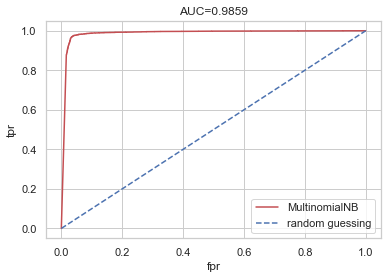

In [110]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc = roc_auc_score(y_test, y_pred_proba[:, 1])
plt.plot(fpr, tpr, "r-", label="MultinomialNB")
plt.plot([0, 1], [0, 1], "b--", label="random guessing")
plt.title("AUC={:.4f}".format(auc))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.legend()